In [43]:
from lightkurve import search_targetpixelfile
from lightkurve import TessTargetPixelFile
import numpy as np

<AxesSubplot:title={'center':'Target ID: 6922244, Cadence: 11922'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

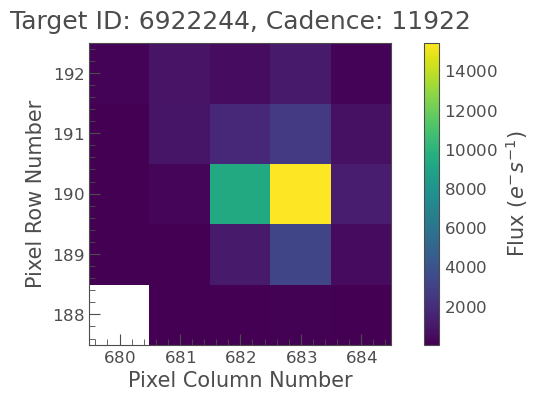

In [44]:
# Download the pixel file for a given star
pix_file = search_targetpixelfile(target="KIC 6922244", author="Kepler", cadence="long", quarter=4).download()
pix_file.plot(frame=7)


<AxesSubplot:xlabel='Time - 2454833 [BKJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

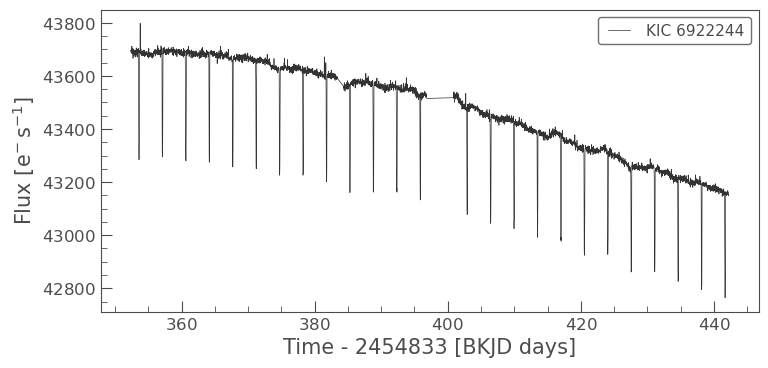

In [45]:
# That was just one, randomly selected frame. Now combine thes frames using Lightkurve.
lc = pix_file.to_lightcurve(aperture_mask=pix_file.pipeline_mask)
lc.plot()

<AxesSubplot:xlabel='Time - 2454833 [BKJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

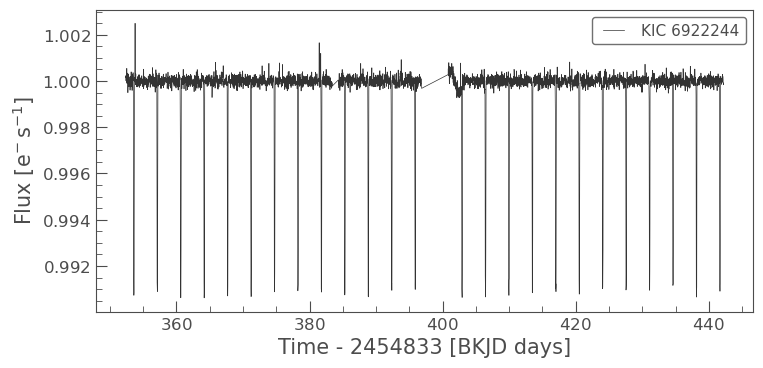

In [46]:
# Note how the whole curve reduces in intensity over time. Let's flatten it.
lc_flat = lc.flatten()
lc_flat.plot()

<AxesSubplot:xlabel='Phase [JD]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

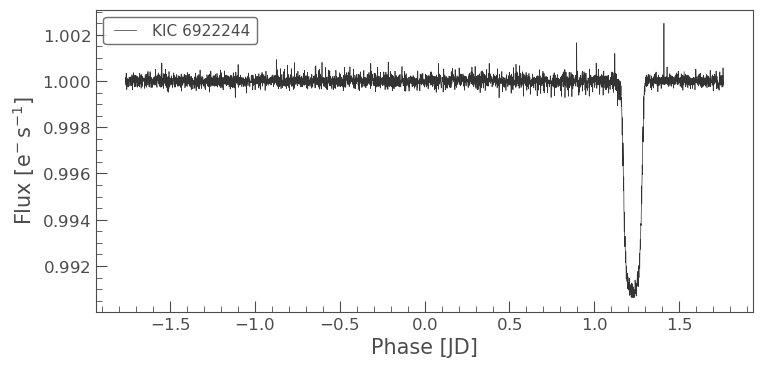

In [63]:
# Now phase-fold the data - if we get the perodicity right the spikes caused by a reansit will line up.
folded = lc_flat.fold(period=3.52265)
folded.plot()

<AxesSubplot:xlabel='Period [$\\mathrm{d}$]', ylabel='BLS Power'>

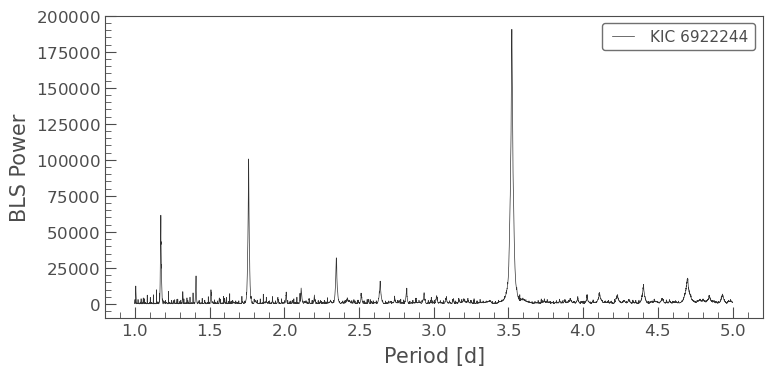

In [55]:
# How did we arrive at the period? We can use a periodgram which will show all the repeated
# patterns in the graph.
period = np.linspace(1, 5, 10000)
box_ls = lc.to_periodogram(method="bls", period=period, frequency_factor=500)
box_ls.plot()

In [62]:
# From the above plot we can see the strongest candidate is around 3.5 days
p_maxpwr = box_ls.period_at_max_power
box_ls.transit_time_at_max_power
box_ls.duration_at_max_power

p_maxpwr

<Quantity 3.52265227 d>